# Lab 03: Linear and logistic regressions

The goal of this lab is to explore linear and logistic regression, implement them yourself and learn to use their respective scikit-learn implementation.

Let us start by loading some of the usual librairies

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Linear regression

We will now implement a linear regression, first using the closed form solution, and second with our gradient descent.

## 1.1 Linear regression data

Our first data set regards the quality ratings of a white _vinho verde_. Each wine is described by a number of physico-chemical descriptors such as acidity, sulfur dioxide content, density or pH.

In [2]:
# load the regression task data
wine_data = pd.read_csv('data/winequality-white.csv', sep=";")
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Load the data into X and y data arrays
X_regr = wine_data.drop(['quality'], axis=1).values
y_regr = wine_data['quality'].values

# Standardize the data
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X_regr)
X_regr = sc.transform(X_regr)

## 1.2 Cross-validation

Let us create a cross-validation utility function (similar to what we have done in Lab 3, but for regression).

In [4]:
# set up folds for cross_validation
from sklearn import model_selection
folds_regr = model_selection.KFold(n_splits=10, shuffle=True)

In [5]:
def cross_validate_regr(design_matrix, labels, regressor, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    regressor:  Regressor instance; must have the following methods:
        - fit(X, y) to train the regressor on the data X, y
        - predict(X) to apply the trained regressor to the data X and return estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Returns:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        regressor.fit(design_matrix[tr,:], labels[tr])
        pred[te] = (regressor.predict(design_matrix[te,:]))
    return pred

## 1.3 Linear regression with scikit-learn

__Question__ Cross-validate scikit-learn's [linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on your data.

In [6]:
from sklearn import linear_model

# Initialize a LinearRegression model
regr = linear_model.LinearRegression()

# Cross-validate it
pred = cross_validate_regr(X_regr, y_regr, regr, folds_regr.split(X_regr, y_regr))

from sklearn import metrics
print("Mean squared error: %.3f" % metrics.mean_squared_error(y_regr, pred))

Mean squared error: 0.568


# 2. Logistic regression

We will now implement a linear regression, first using the closed form solution, and second with our gradient descent.

## 2.1 Logistic regression data

Our second data set comes from the world of bioinformatics. In this data set, each observation is a tumor, and it is described by the expression of 3,000 genes. The expression of a gene is a measure of how much of that gene is present in the biological sample. Because this affects how much of the protein this gene codes for is produced, and because proteins dictacte what cells can do, gene expression gives us valuable information about the tumor. In particular, the expression of the same gene in the same individual is different in different tissues (although the DNA is the same): this is why blood cells look different from skin cells. In our data set, there are two types of tumors: breast tumors and ovary tumors. Let us see if gene expression can be used to separate them!

In [7]:
# Load the classification task data
breast_data = pd.read_csv('data/small_Breast_Ovary.csv')

# Drop the 'Tissue' column to create the design matrix
X_clf = np.array(breast_data.drop(['Tissue', 'ID_REF'], axis=1).values)

# Use the 'Tissue' column to create the labels (0=Breast, 1=Ovary)
y_clf = np.array(breast_data['Tissue'].values)
y_clf[np.where(y_clf == 'Breast')] = 0
y_clf[np.where(y_clf == 'Ovary')] = 1
y_clf = y_clf.astype(np.int)

#sc = preprocessing.StandardScaler()
#sc.fit(X_clf)
#X_clf = sc.transform(X_clf)

__Question:__ How many samples do we have? How many belong to each class? How many features do we have?

In [8]:
print("Number of samples : ", len(y_clf))
print("Class Breast : ", sum(y_clf == 0))
print("Class Ovary  : ", sum(y_clf == 1))

Number of samples :  542
Class Breast :  344
Class Ovary  :  198


## 2.2 Cross-validation

Let us create a cross-validation utility function (similar to what we have done in Lab 3).

In [9]:
# Set up folds for cross_validation
from sklearn import model_selection
folds_clf = model_selection.StratifiedKFold(n_splits=10, shuffle=True)

In [10]:
def cross_validate_clf(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        classifier.fit(design_matrix[tr,:], labels[tr])
        pred[te] = classifier.predict_proba(design_matrix[te,:])[:,1]
    return pred

## 2.3 Logistic regression with scikit-learn

__Question__ Cross-validate scikit-learn's [linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on your data.

In [11]:
from sklearn import linear_model

# Initialize a LogisticRegression model. 
# Use C=1e7 to ensure there is no regularization (we'll talk about regularization next time!)
clf = linear_model.LogisticRegression(C=1e7)

# Cross-validate it
ypred_logreg = cross_validate_regr(X_clf, y_clf, clf, folds_clf.split(X_clf, y_clf))

#print("Accuracy: %.3f" % metrics.accuracy_score(ypred_logreg > 0.5, 1, 0))
print("Accuracy: %.3f" % metrics.accuracy_score(ypred_logreg > 0.5, y_clf))

Accuracy: 0.948


** Question : ** Plot the ROC curve. Use plt.semilogx to use a logarithmic scale on the x-axis. This "spreads out" the curve a little, making it easier to read.

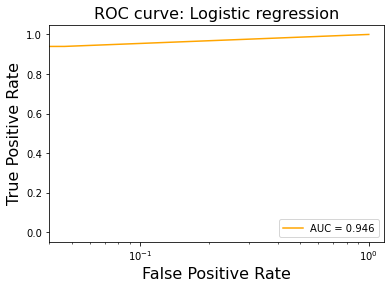

In [12]:
fpr_logreg, tpr_logreg, thresholds = metrics.roc_curve(y_clf, ypred_logreg, pos_label=1)
auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

plt.semilogx(fpr_logreg, tpr_logreg, '-', color='orange', 
             label='AUC = %0.3f' % auc_logreg)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")

### Data scaling
See [preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Question** Scale the data, and compute the cross-validated predictions of the logistic regression on the scaled data.

In [13]:
from sklearn import preprocessing

# Scale the data with preprocessing.StandardScaler
# Initialize a scaler
scaler = preprocessing.StandardScaler()
# Scale your design matrix
X_clf_scaled = scaler.fit_transform(X_clf)

# Initialize a LogisticRegression model. 
# Use C=1e7 to ensure there is no regularization (we'll talk about regularization next time!)
clf = linear_model.LogisticRegression(C=1e7)

# Cross-validate it for the scaled data
ypred_logreg_scaled = cross_validate_regr(X_clf_scaled, y_clf, clf, folds_clf.split(X_clf_scaled, y_clf))

print("Accuracy: %.3f" % metrics.accuracy_score(ypred_logreg_scaled > 0.5, y_clf))

Accuracy: 0.952


**Question** Plot the two ROC curves (one for the logistic regression on the original data, one for the logistic regression on the scaled data) on the same plot.

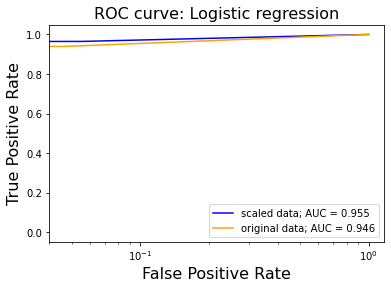

In [14]:
fpr_logreg_scaled, tpr_logreg_scaled, thresholds = metrics.roc_curve(y_clf, ypred_logreg_scaled, pos_label=1)
auc_logreg_scaled = metrics.auc(fpr_logreg_scaled , tpr_logreg_scaled )

plt.semilogx(fpr_logreg_scaled, tpr_logreg_scaled, '-', color='blue', 
             label='scaled data; AUC = %0.3f' % auc_logreg_scaled)
plt.semilogx(fpr_logreg, tpr_logreg, '-', color='orange', 
             label='original data; AUC = %0.3f' % auc_logreg)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")

In a cross-validation setting, we ignore the samples from the test fold when training the classifier. This also means that scaling should be done on the training data only. 

In scikit-learn, we can use a scaler to make centering and scaling happen independently on each feature by computing the relevant statistics on the samples *in the training set*. 
The mean and standard deviation will be stored to be used on the test data.

**Question** Rewrite the cross_validate method to include a scaling step.

In [15]:
def cross_validate_clf_with_scaling(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        scaler = preprocessing.StandardScaler()
        scaler.fit(design_matrix[tr,:])
        scaler.transform(design_matrix)
        classifier.fit(design_matrix[tr,:], labels[tr])
        pred[te] = classifier.predict_proba(design_matrix[te,:])[:,1]
    return pred

**Question** Now use the cross_validate_with_scaling method to cross-validate the logistic regression on our data.

In [16]:
clf = linear_model.LogisticRegression(C=1e6) 
ypred_logreg_scaled_ = cross_validate_clf_with_scaling(X_clf, y_clf, clf, folds_clf.split(X_clf, y_clf))
print(metrics.accuracy_score(y_clf, np.where(ypred_logreg_scaled_ > 0.5, 1, 0)))

0.9538745387453874


**Question** Again, compare the AUROC and ROC curves with those obtained previously. What do you conclude?

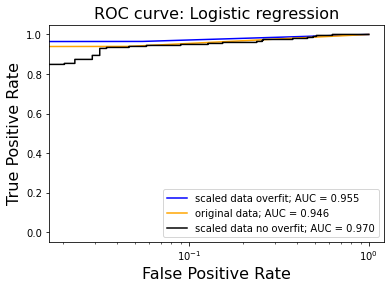

In [17]:
fpr_logreg_scaled_, tpr_logreg_scaled_, thresholds = metrics.roc_curve(y_clf, ypred_logreg_scaled_, pos_label=1)
auc_logreg_scaled_ = metrics.auc(fpr_logreg_scaled_, tpr_logreg_scaled_)

plt.semilogx(fpr_logreg_scaled, tpr_logreg_scaled, '-', 
             color='blue', label='scaled data overfit; AUC = %0.3f' % auc_logreg_scaled)
plt.semilogx(fpr_logreg, tpr_logreg, '-', color='orange', 
             label='original data; AUC = %0.3f' % auc_logreg)
plt.semilogx(fpr_logreg_scaled_, tpr_logreg_scaled_, '-', color='black', 
             label='scaled data no overfit; AUC = %0.3f' % auc_logreg_scaled_)


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")